# Hotel X Booking Demand

## Business Problem Understanding

**Context**

Sebuah hotel X yang terletak di Portugal benua Eropa hendak menganalisa performansi booking demand hotel dengan cara melihat data customer booking pada hotel tersebut. Portugal merupakan salah satu destinasi wisata dengan pengunjung terbanyak.
Namun, para turis atau pendatang ke Portugal mulai menggunakan opsi lain untuk tinggal seperti Airbnb. Menurut [Hotel Bed Occupancy Rate in Portugal 2022](https://www.statista.com/statistics/778341/hotel-bed-place-occupancy-rates-portugal/), pada tahun 2022 bed occupancy rate pada hotel di Portugal adalah hanya sebesar 45.7% sepanjang tahunnya. Namun, Portugal menjadi salah satu destinasi wisata dengan tourism infrastructure terbaik di dunia dengan menduduki peringkat 1 berkat hotel densitynya [Protugal 1st Hotel Density Globally](https://www.elibrary.imf.org/view/journals/002/2022/204/article-A002-en.xml#:~:text=Based%20on%20the%20Travel%20and,quality%20tourism%20infrastructure%20(5th).).

Oleh karena itu, penting bagi sebuah hotel di Portugal untuk memiliki sistem booking yang reliable agar menjamin customer dapat reserve room di hotel tersebut. Terlebih, dengan adanya sistem booking pada suatu hotel yang baik, akan menekan angka ketidaktersediaan kamar dikarenakan orang yang sudah booking namun memilih untuk cancel bookingnya. Hal tersebut menyediakan ruang bagi para customer yang datang secara langsung untuk booking hotel tersebut.

**Problem Statement**

Tantangan terbesar untuk Hotel X saat ini adalah dengan hadirnya Airbnb yang menawarkan pengalaman lokal sehingga lebih menarik bagi wisatawan. Harga dari Airbnb untuk luas kamar yang sama memiliki perbedaan sebesar 48.88% ([Airbnb vs Hotel price in Portugal](https://www.bizneworleans.com/with-hotel-prices-rising-in-europe-airbnb-is-viable-alternative/#:~:text=Lisbon%2C%20Portugal%2C%20secured%20the%20third,to%20a%2048.88%25%20price%20difference.)) Terlebih, tantangan Hotel X juga termasuk hotel-hotel lain yang berada di Portugal.

Oleh karena itu, untuk memenangi kompetisi antar hotel dan Airbnb di Portugal, Hotel X dapat menekan angka biaya operasi sehingga profit hotel dapat naik dengan cara mengoptimalkan sistem booking mereka. Dari sistem booking hotel X, terdapat data cancel booking oleh customer. Hal ini memberikan ruang untuk memprediksi apakah booking yang dilakukan customer akan cancel atau tidak sehingga customer yang datang langsung ke Hotel X dapat tetap mendapatkan kamar dan tidak ada kamar yang kosong dikarenakan customer melakukan cancel.



**Goals**

Berdasarkan problem statement diatas, maka hotel X dapat menaikkan daya saingnya pada market dengan memanfaatkan data hotel booking demand yang telah dimiliki. Dari data tersebut, dapat di prediksi apakah suatu booking akan di cancel atau tidak. Hal ini dapat mengurangi potensi adanya kamar kosong yang pada kenyataannya mungkin untuk disewakan oleh orang yang tidak booking terlebih dahulu. Sehingga, dapat memaksimalkan profit yang diperoleh hotel X.

**Analytic Approach**

Pola analisis yang akan dilakukan adalah dengan menganalisis data untuk menemukan pola customer yang melakukan cancel booking dan yang tidak.

Sehingga, kita dapat membangun model klasifikasi yang akan membantu perusahaan untuk memprediksi probabilitas apakah customer tersebut akan cancel booking atau tidak.

**Metric Evaluation**

# Data Understanding

Dataset Hotel Booking Demand source: https://drive.google.com/drive/folders/17KIeOXK7eYGuzgpn_IljlUFcE4v96lSL

In [1]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from datetime import datetime
import missingno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from statistics import mean



In [2]:
df = pd.read_csv('data_hotel_booking_demand.csv')
pd.set_option('display.max_columns', None)
display(df.head())

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [3]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


## Hotel Booking Demand Dictionary
- country: country of origin
- market_segment: market segment designation (TA: Travel Agent, TO: Tour Operators)
- previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
- booking_changes: number of changes / amendments made to the booking from the moment the booking was entered on the PMS (Property Management System) until the moment of check-in or cancellation
- deposit_type: indication on if the customer made a deposit to guarantee the booking
- days_in_waiting_list: number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type: type of booking
- reserved_room_type: code of room type reserved. code is presented instead of designation for anonymity reasons
- required_car_parking_space: number of car parking spaces required by the customer
- total_of_special_request: number of special requests made by the customer (e.g. twin bed or high floor)
- is_canceled: value indicating if the booking was canceled (1) or not (0)

Dari dataset tersebut, kita perlu melihat unique value dari setiap columnnya untuk memastikan pengisian data sudah relevan dengan analisis yang akan dilakukan

In [5]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns:
    unique_values = df[col].unique()
    num_unique = df[col].nunique()
    listItem.append([col, num_unique, unique_values])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc


,Column Name,Number of Unique,Unique Sample
0,country,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, nan, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]"
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
3,booking_changes,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]"
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 391, 20, 1, 41, 147, 55, 80, 379, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, ...]"
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4, 5]"


# Exploratory Data Analysis

# Data Cleaning

Sebelum masuk kepada analisis, dataset akan dibersihkan terlebih dahulu sesuai dengan kebutuhan analisis dan pembuatan model machine learningnya.

In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[CHE, SWE]"
1,market_segment,object,0,0.00,8,"[Online TA, Groups]"
2,previous_cancellations,int64,0,0.00,15,"[25, 3]"
3,booking_changes,int64,0,0.00,19,"[10, 9]"
4,deposit_type,object,0,0.00,3,"[Non Refund, No Deposit]"
5,days_in_waiting_list,int64,0,0.00,115,"[50, 2]"
6,customer_type,object,0,0.00,4,"[Transient, Transient-Party]"
7,reserved_room_type,object,0,0.00,10,"[A, H]"
8,required_car_parking_spaces,int64,0,0.00,5,"[3, 0]"
9,total_of_special_requests,int64,0,0.00,6,"[0, 2]"


Terdapat data yang hilang/kosong pada kolom country, sehingga perlu dilakukan handling missing value pada kolom tersebut.

<Axes: >

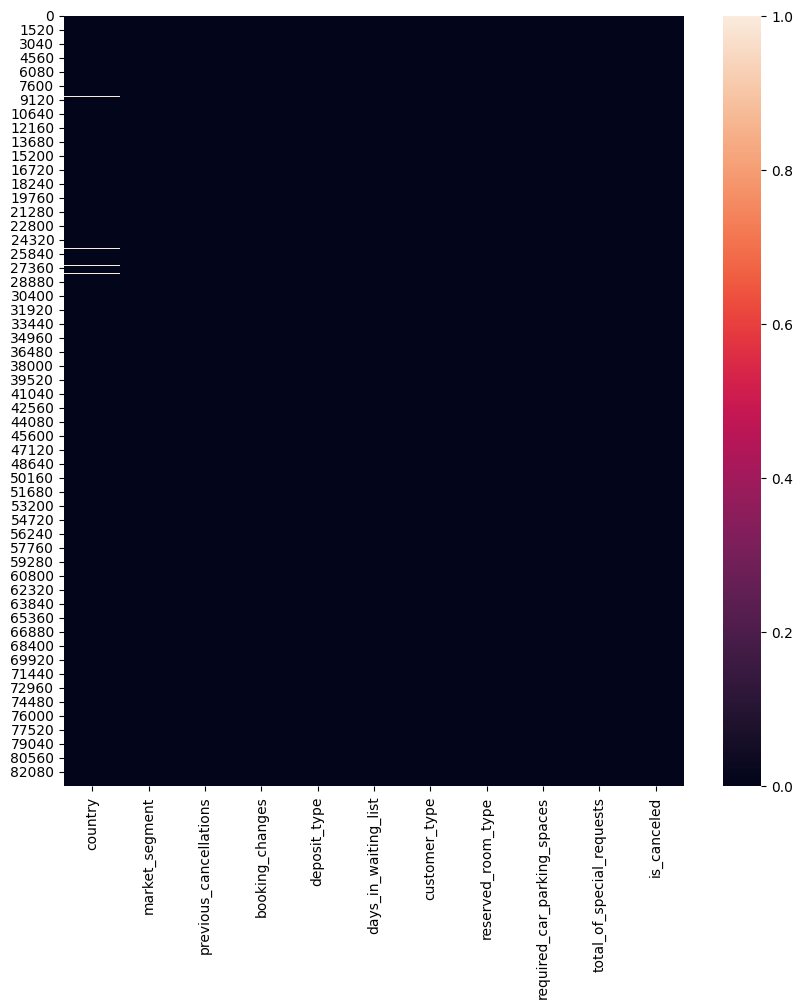

In [7]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['country','market_segment','previous_cancellations','booking_changes','deposit_type','days_in_waiting_list','customer_type','reserved_room_type','required_car_parking_spaces','total_of_special_requests','is_canceled']].isna())

Terlihat dari heatmap diatas bahwa terdapat missing value hanya pada kolom country dengan bauran sebesar 0.42 % dari keseluruhan data. Sehingga, missing value tersebut dapat di drop saja

In [8]:
df = df.dropna()

Data dengan missing value pada kolom country dengan bauran sebesar 0.42% sudah di drop

Berikutnya, dataset dicheck apabila terdapat duplicates atau tidak

In [9]:
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 73138 entries, 7 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      73138 non-null  object
 1   market_segment               73138 non-null  object
 2   previous_cancellations       73138 non-null  int64 
 3   booking_changes              73138 non-null  int64 
 4   deposit_type                 73138 non-null  object
 5   days_in_waiting_list         73138 non-null  int64 
 6   customer_type                73138 non-null  object
 7   reserved_room_type           73138 non-null  object
 8   required_car_parking_spaces  73138 non-null  int64 
 9   total_of_special_requests    73138 non-null  int64 
 10  is_canceled                  73138 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 6.7+ MB


Setelah dataset sudah di check duplicatesnya, maka kita perlu untuk drop duplicates tersebut agar data yang di analisis tidak ganda.

In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
10079,GBR,Direct,0,2,No Deposit,0,Transient-Party,A,1,1,0
10080,CHN,Online TA,0,0,No Deposit,0,Transient-Party,C,0,2,0
10081,BEL,Groups,0,0,No Deposit,0,Transient-Party,A,0,1,0
10082,NLD,Online TA,0,0,No Deposit,0,Transient,B,0,0,0


In [11]:
df.duplicated().sum()

0

Dari drop duplicate diatas dapat dilihat bahwa sudah tidak ada lagi baris yang memiliki duplikat data

Kemudian, dapat dilihat dari dataset pada kolom market segment, bahwa value 'undefined' hanya memiliki 1 baris data saja. Terlebih, market segmen 'undefined' rancu artinya apabila dimasukkan ke dalam analisis.

In [12]:
undefined_market_segment_count = (df['market_segment'] == 'Undefined').sum()
print(f"Number of rows with 'Undefined' in the 'market_segment' column: {undefined_market_segment_count}")


Number of rows with 'Undefined' in the 'market_segment' column: 1


Sehingga, baris tersebut dapat di drop saja.

In [13]:
print("Shape of DataFrame before dropping 'Undefined' rows:", df.shape)

df = df[df['market_segment'] != 'Undefined']

print("Shape of DataFrame after dropping 'Undefined' rows:", df.shape)


Shape of DataFrame before dropping 'Undefined' rows: (10084, 11)
Shape of DataFrame after dropping 'Undefined' rows: (10083, 11)


In [14]:
df.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

# Data Analysis

Dari dataset hotel booking demand, dapat dilihat berapa banyak orang yang cancel booking mereka dan yang tidak.

In [15]:
cancellation_counts = df['is_canceled'].value_counts()

print("Counts of Booking Cancellations:")
print(cancellation_counts)

Counts of Booking Cancellations:
is_canceled
0    7688
1    2395
Name: count, dtype: int64


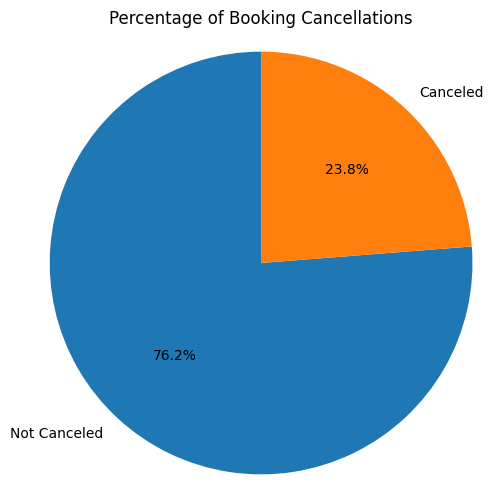

In [16]:
cancellation_counts = df['is_canceled'].value_counts()

labels = ['Not Canceled', 'Canceled']

plt.figure(figsize=(6, 6))
plt.pie(cancellation_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Booking Cancellations")
plt.axis('equal') 
plt.show()

Dapat dilihat dari chart diatas bahwa customer yang melakukan cancellation pada bookingnya sebesar 23.8% sedangkan customer yang tidak melakukan cancel pada bookingnya sebesar 76.2%.

Average hotel price di portugal sebesar €137 [Average 2023 Hotel Price in Portugal](https://www.theportugalnews.com/news/2023-08-13/hotel-prices-up-30/80422#:~:text=In%20Portugal%2C%20during%20the%20first,recorded%20in%20the%20same%20period%20.). Sehingga diasumsikan apabila Hotel X memiliki 158.000 [Average number of yearly Hotel Rooms booked in Portugal](https://www.statista.com/statistics/613863/number-of-hotel-bedrooms-portugal/). Maka cancellation akan kehilangan potensi income sebesar (158.000 x 23.8%) x €137 = €5,151,000 

€ 4.01 million is the average yearly revenue of hotels in portugal[Hotel Yearly Revenue in Portugal](https://www.statista.com/forecasts/905759/hotels-and-similar-accommodation-revenue-in-Portugal)


Sehingga, hotel mengalami kerugian sebesar €4,010,000 €5,151,000 = -€1,141,000 

Kemudian, dilakukan T-Test cancellation booking terhadap previous cancellations untuk mengetahui seberapa signifikan previous cancellations terhadap cancellation pada booking.

In [17]:
canceled = df[df['is_canceled'] == 1]
not_canceled = df[df['is_canceled'] == 0]

t_stat, p_value = ttest_ind(canceled['previous_cancellations'], not_canceled['previous_cancellations'])
print("T-Test for Previous Cancellations:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-Test for Previous Cancellations:
T-statistic: 7.723774475824305
P-value: 1.2367393004099538e-14


Dapat dilihat dari hasil T-Test positif 7.72. Hal ini menandakan bahwa cancellation cenderung terjadi apabila customer sebelumnya telah melakukan cancel (previous cancellation).

In [18]:
contingency_table = pd.crosstab(df['market_segment'], df['is_canceled'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test for Market Segment and Cancellations:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-Square Test for Market Segment and Cancellations:
Chi-square value: 300.908261058153
P-value: 5.2257967318631086e-62


P-value yang diperoleh dari uji diatas menunjukkan angka yang mendekati 0. Hal ini menunjukkan bahwa ada association yang signifikan antara market segment dan cancellations. 

Chi-Square value 304.05 menunjukkan bahwa terdapat association yang signifikan.

Sehingga, dapat disimpulkan bahwa market segment berpengaruh besar terhadap cancellation

Kemudian, kita dapat melakukan analisis terhadap market segment pada hotel X.

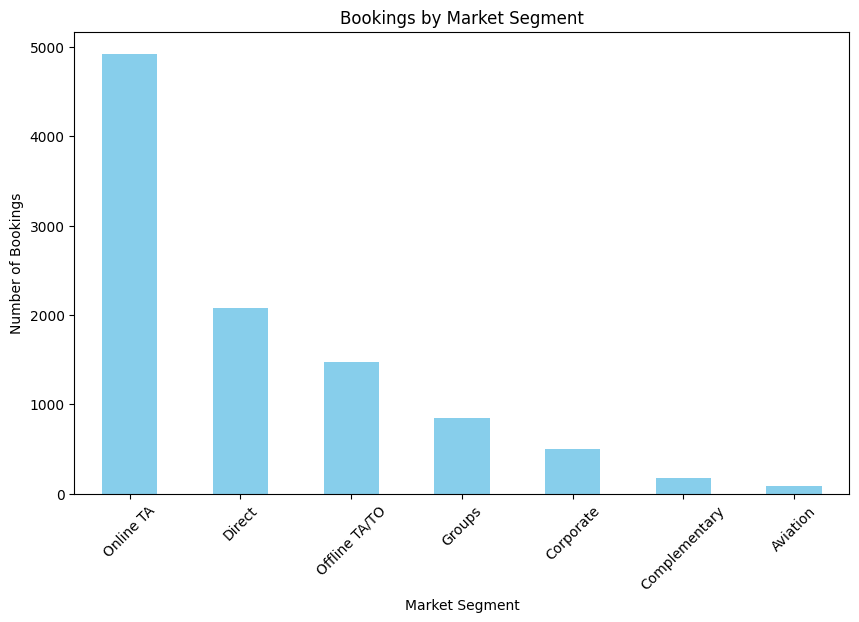

In [19]:
market_segment_counts = df['market_segment'].value_counts()

plt.figure(figsize=(10, 6))
market_segment_counts.plot(kind='bar', color='skyblue')
plt.title("Bookings by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [20]:
market_segment_counts = df['market_segment'].value_counts()

print("Number of Bookings by Market Segment:")
print(market_segment_counts)

market_segment_counts = df['market_segment'].value_counts()
percentage_per_segment = (market_segment_counts / market_segment_counts.sum()) * 100

print("Percentage of Bookings by Market Segment:")
print(percentage_per_segment)


Number of Bookings by Market Segment:
market_segment
Online TA        4924
Direct           2079
Offline TA/TO    1469
Groups            845
Corporate         505
Complementary     180
Aviation           81
Name: count, dtype: int64
Percentage of Bookings by Market Segment:
market_segment
Online TA        48.834672
Direct           20.618863
Offline TA/TO    14.569077
Groups            8.380442
Corporate         5.008430
Complementary     1.785183
Aviation          0.803332
Name: count, dtype: float64


Dapat dilihat dari graph diatas bahwa market segment Online TA(Travel Agent) memiliki porsi paling besar yaitu sebesar 48.83%. diikuti dengan seperti list diatas.

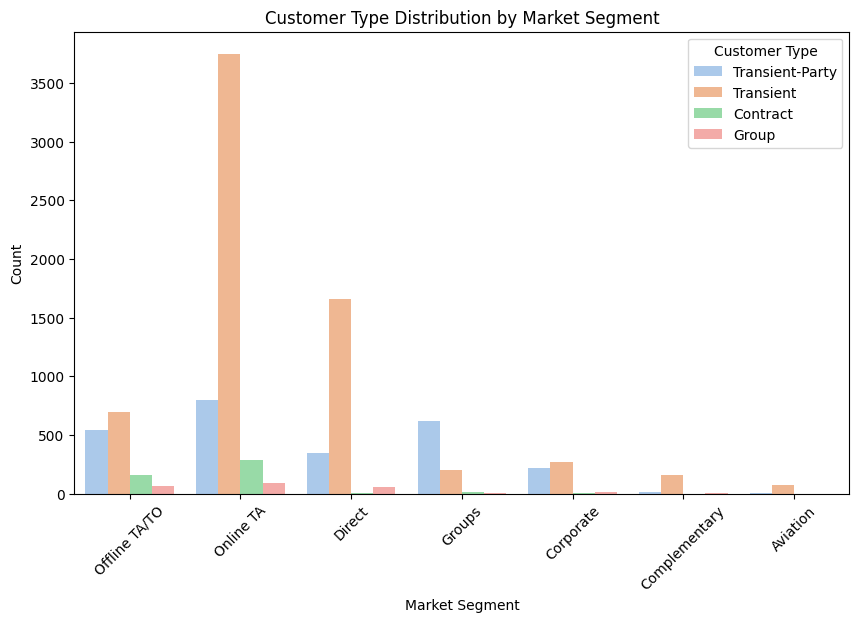

In [21]:
# Plot the distribution of 'customer_type' within each market segment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='market_segment', hue='customer_type', palette='pastel')
plt.title("Customer Type Distribution by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.show()

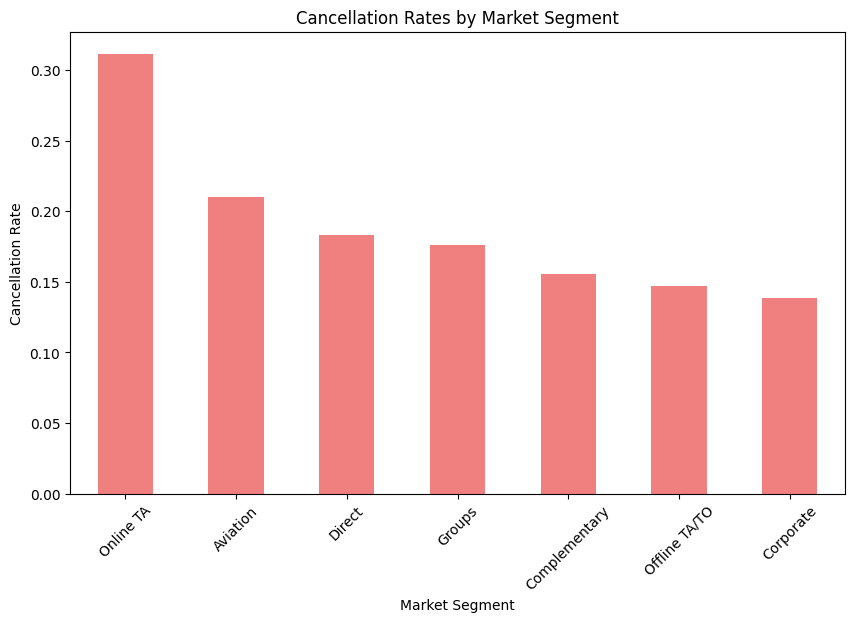

In [22]:
cancellation_rates = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cancellation_rates.plot(kind='bar', color='lightcoral')
plt.title("Cancellation Rates by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=45)
plt.show()

In [23]:
cancellation_rates = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)

cancellation_rates_list = cancellation_rates.tolist()

market_segments_list = cancellation_rates.index.tolist()

result_list = list(zip(market_segments_list, cancellation_rates_list))

for segment, rate in result_list:
    print(f"Market Segment: {segment}, Cancellation Rate: {rate:.2f}")


Market Segment: Online TA, Cancellation Rate: 0.31
Market Segment: Aviation, Cancellation Rate: 0.21
Market Segment: Direct, Cancellation Rate: 0.18
Market Segment: Groups, Cancellation Rate: 0.18
Market Segment: Complementary, Cancellation Rate: 0.16
Market Segment: Offline TA/TO, Cancellation Rate: 0.15
Market Segment: Corporate, Cancellation Rate: 0.14


Dapat dilihat bahwa cancellation rate paling tinggi adalah 31% pada market segment Online TA.

Dapat dilihat pula dari hasil visualisasi diatas bahwa pada market segmen Online TA, customer type yang paling besar adalah customer type Transient

## Hasil Data Analysis

Dari data analysis yang telah dilakukan, dapat disimpulkan bahwa:
- Cancellation yang terjadi pada Hotel X mengakibatkan hilang income sebesar €5,151,000
- Hotel mengalami kerugian -€1,141,000 akibat cancellation 
- Customer yang telah melakukan cancellation berpotensi tinggi untuk melakukan cancel kembali terhadap booking
- Pada market segmen Online TA, customer type paling banyak adalah Transient
- Booking paling banyak dilakukan oleh market segment Online TA
- Begitu juga dengan cancellation rate paling banyak dilakukan oleh market segment Online TA

Oleh karena itu, penting bagi Hotel X untuk mengetahui apakah booking akan dicancel atau tidak untuk menekan angka kehilangan income akibat room yang tercancel oleh customer.

# Data Preprocessing

In [24]:
# Library

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler


Sebelum analisis dilanjutkan, data preprocessing dilakukan terhadap dataset.

In [25]:
# Define categorical columns and target variable
categorical_columns = ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
numerical_columns = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
target_column = 'is_canceled'

# Split the data into features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessors for categorical and numerical features
categorical_preprocessor = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
numerical_preprocessor = StandardScaler()

# Create a preprocessor to handle both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_preprocessor, categorical_columns),
        ('num', numerical_preprocessor, numerical_columns)
    ])

# Create a pipeline with preprocessing
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Apply preprocessing to the training and testing data
X_train_preprocessed = pd.DataFrame(preprocessing_pipeline.fit_transform(X_train))
X_test_preprocessed = preprocessing_pipeline.transform(X_test)
X_train_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.106913,0.150895,-0.159844,-0.416875,-0.910026
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.106913,0.150895,-0.159844,-0.416875,0.047859
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.106913,0.150895,-0.159844,2.113234,0.047859
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.106913,2.448795,2.704455,-0.416875,-0.910026
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# Modelling & Evaluation

In [26]:
random_forest_classifier = RandomForestClassifier(random_state=42)
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
support_vector_machine = SVC(probability=True)
gradient_boosting = GradientBoostingClassifier()
KNearest_Neighbor = KNeighborsClassifier()

## Model Benchmarking: K-Fold

In [27]:
# Benchmark models
models = {
    'RFC': random_forest_classifier,
    'Logistic Regression': logistic_regression,
    'Decision Tree': decision_tree,
    'SVM': support_vector_machine,
    'Gradient Boosting': gradient_boosting,
    'KNN': KNearest_Neighbor,
}

results = {
    'Model': [],
    'Accuracy': []
}

# Perform K-Fold cross-validation and collect results
for name, model in models.items():
    scores = cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')
    accuracy_mean = scores.mean()
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_mean)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

results_df.set_index('Model', inplace=True)

pd.set_option('display.float_format', '{:.6f}'.format)
results_df

,Accuracy
Model,
Gradient Boosting,0.798909
SVM,0.791099
Logistic Regression,0.778205
KNN,0.745970
RFC,0.709646
Decision Tree,0.686835


Dapat dilihat bahwa model Gradient Boosting memiliki tingkat akurasi paling tinggi pada model benchmarking: k-fold jika dibandingkan model lainnya.

## Model Benchmarking: Test Data

In [28]:
models = [random_forest_classifier, logistic_regression, decision_tree, support_vector_machine, gradient_boosting, KNearest_Neighbor]

score_roc_auc = []

def y_pred_func(i):
    estimator = Pipeline([
        ('preprocess', preprocessing_pipeline),
        ('model', i)
    ])
    estimator.fit(X_train, y_train)
    return (estimator, estimator.predict(X_test))

model_names = ['RFC', 'Logistic Regression', 'Decision Tree', 'SVM', 'Gradient Boosting', 'KNN']

for model, name in zip(models, model_names):
    estimator, y_pred = y_pred_func(model)
    y_predict_proba = estimator.predict_proba(X_test)[:, 1]
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    print(name, '\n', classification_report(y_test, y_pred))

data = {
    'Model': model_names,
    'ROC AUC Score': score_roc_auc
}
# Create the DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by 'ROC AUC Score' in descending order
df = df.sort_values(by='ROC AUC Score', ascending=False)

# Set the 'Model' column as the index
df.set_index('Model', inplace=True)

# Display the DataFrame
pd.set_option('display.float_format', '{:.6f}'.format)
df

RFC 
               precision    recall  f1-score   support

           0       0.77      0.82      0.80      1533
           1       0.30      0.24      0.27       484

    accuracy                           0.68      2017
   macro avg       0.54      0.53      0.53      2017
weighted avg       0.66      0.68      0.67      2017

Logistic Regression 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1533
           1       0.62      0.31      0.41       484

    accuracy                           0.79      2017
   macro avg       0.71      0.62      0.64      2017
weighted avg       0.76      0.79      0.76      2017

Decision Tree 
               precision    recall  f1-score   support

           0       0.76      0.81      0.79      1533
           1       0.26      0.20      0.23       484

    accuracy                           0.67      2017
   macro avg       0.51      0.51      0.51      2017
weighted avg       0.64      0

,ROC AUC Score
Model,
Gradient Boosting,0.844576
Logistic Regression,0.829320
SVM,0.818603
KNN,0.730379
RFC,0.689597
Decision Tree,0.527024


Setelah dilakukan model benchmarking, dan diperoleh Gradient Boosting dengan performanya yang terbaik pada test data ditunjukkan melalui ROC AUC score diatas.

Dilakukan perbandingan pada metrics ROC AUC dikarenakan ROC AUC(Receiver Operating Characteristic - Area Under the Curve) merupakan metric yang biasa digunakan untuk mengevaluasi performansi dari binary classification seperti yang sedang dilakukan yaitu binary classification untuk memprediksi apakah booking akan dicancel atau tidak.

Hasil ROC AUC semakin mendekati nilai 1 berarti model dapat membedakan tiap class nya (class 0 dan class 1, apakah booking cancel atau tidak)

Gradient Boosting Classifier:
- Memiliki high accuracy dalam memprediksi binary classification
- Merupakan teknik ensemble learning yang mengkombinasikan prediksi dari beberapa weak learners (decision trees) untuk memperoleh predictive model yang kuat. Model ini dapat menaikkan strength dari berbagai learners dengan cara memitigasi kekurangannya.
- Model ini memiliki sifat yang kokoh terhadap overfitting dengan cara cross-validation.
- Gradient boosting menghasilkan feature importance score yang dapat memahami feature mana yang berpengaruh besar pada prediksi.


Kemudian, model Gradient Boosting dilakukan test oversampling untuk melihat apakah hasilnya dapat lebih baik lagi.

## Test Oversampling with K-Fold Cross Validation

Digunakan imbalanced-learn library untuk oversampling test dengan menggunakan Random Over Sampler.

Metrics yang digunakan dalam menganalisa model adalah Precision, Recall, F1-Score, dan Support.


- Precision: adalah proporsi dari prediksi true positive (benar memprediksi cancellations) dari semua positive predictions (false positive dan true positive)
Dalam konteks hotel booking cancellations, precisions yang tinggi mengindikasikan berapa banyak prediksi cancellations yang benar.

- Recall: adalah proporsi prediksi true positive dari semua actual positives. Recall mengukur kemampuan model untuk mengidentifikasi actual cancellations. nilai recall yang tinggi berarti model dapat mengidentifikasi actual cancellations.

- F1-Score: adalah harmonic mean dari precision dan recall. metric ini menyediakan pengukuran yang balance dari performansi model. dalam menentukan balance antara Precision dan Recall, metric ini dapat membantu menemukan jalan tengahnya.

- Support: adalah jumlah sample pada dataset yang memiliki specific class (class 0 dan 1). Metric ini dapat membantu untuk memahami distribusi class pada dataset dan membantu precision, recall, dan F1-Score masuk kedalam konteks analisis model.

In [50]:
n_splits = 10

train_reports = []
test_reports = []
roc_auc_scores = []

model = GradientBoostingClassifier()

kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for train_index, test_index in kfold.split(X_train_preprocessed, y_train):
    X_train_fold, X_test_fold = X_train_preprocessed.iloc[train_index], X_train_preprocessed.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    ros = RandomOverSampler(random_state=42)
    X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_fold, y_train_fold)

    model.fit(X_train_oversampled, y_train_oversampled)

    train_pred = model.predict(X_train_fold)
    test_pred = model.predict(X_test_fold)

    train_report = classification_report(y_train_fold, train_pred)
    test_report = classification_report(y_test_fold, test_pred)

    train_roc_auc = roc_auc_score(y_train_fold, model.predict_proba(X_train_fold)[:, 1])
    test_roc_auc = roc_auc_score(y_test_fold, model.predict_proba(X_test_fold)[:, 1])

    train_reports.append(train_report)
    test_reports.append(test_report)
    roc_auc_scores.append((train_roc_auc, test_roc_auc))

for i in range(n_splits):
    print(f"Fold {i+1} - Train Report:\n{train_reports[i]}")
    print(f"Fold {i+1} - Test Report:\n{test_reports[i]}")
    print(f"Fold {i+1} - Train ROC AUC Score: {roc_auc_scores[i][0]:.6f}")
    print(f"Fold {i+1} - Test ROC AUC Score: {roc_auc_scores[i][1]:.6f}")
    print("-" * 50)

average_train_roc_auc = np.mean([score[0] for score in roc_auc_scores])
average_test_roc_auc = np.mean([score[1] for score in roc_auc_scores])
print(f"Average Train ROC AUC Score: {average_train_roc_auc:.6f}")
print(f"Average Test ROC AUC Score: {average_test_roc_auc:.6f}")


Fold 1 - Train Report:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      5539
           1       0.47      0.88      0.61      1720

    accuracy                           0.74      7259
   macro avg       0.71      0.79      0.71      7259
weighted avg       0.84      0.74      0.76      7259

Fold 1 - Test Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       616
           1       0.44      0.83      0.58       191

    accuracy                           0.71       807
   macro avg       0.68      0.75      0.68       807
weighted avg       0.81      0.71      0.73       807

Fold 1 - Train ROC AUC Score: 0.859340
Fold 1 - Test ROC AUC Score: 0.830791
--------------------------------------------------
Fold 2 - Train Report:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      5539
           1       0.47      0.88      0.

Dapat dilihat bahwa nilai Average Train ROC AUC Score = 0.858. Hal ini menunjukkan bahwa model dapat membedakan positive dan negative classes pada training data. Semakin tinggi nilai ROC AUC maka model dapat membedakan setiap class secara efektif

Sedangkan untuk Average Test ROC AUC Score = 0.843. Hasil tersebut menunjukkan kemampuan model untuk membedakan positif dan negatif class pada test data (data validasi pada setiap fold). Ini menandakan sebagaimana baik model generalisasi unseen data. Semakin tinggi nilai tersebut pada test data menunjukkan bahwa model dapat membuat prediksi yang akurat pada data yang unseen.

## Evaluation Metrics Without Oversampling

In [49]:
listItem = []

for train_index, test_index in kfold.split(X_train_preprocessed, y_train):
    X_train_fold, X_test_fold = X_train_preprocessed.iloc[train_index], X_train_preprocessed.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_train_fold, y_train_fold)
    y_train_pred = model.predict(X_train_fold)
    y_test_pred = model.predict(X_test_fold)

    train_accuracy = accuracy_score(y_train_fold, y_train_pred)
    test_accuracy = accuracy_score(y_test_fold, y_test_pred)
    train_roc_auc = roc_auc_score(y_train_fold, y_train_pred)
    test_roc_auc = roc_auc_score(y_test_fold, y_test_pred)
    train_f1 = f1_score(y_train_fold, y_train_pred)
    test_f1 = f1_score(y_test_fold, y_test_pred)
    train_recall = recall_score(y_train_fold, y_train_pred)
    test_recall = recall_score(y_test_fold, y_test_pred)
    train_precision = precision_score(y_train_fold, y_train_pred)
    test_precision = precision_score(y_test_fold, y_test_pred)

    listItem.append([train_accuracy, test_accuracy, train_roc_auc, test_roc_auc, train_f1, test_f1,
                     train_recall, test_recall, train_precision, test_precision])

dfEvaluate = pd.DataFrame(listItem, columns=['Train Accuracy',
                                             'Test Accuracy',
                                             'Train ROC AUC',
                                             'Test ROC AUC',
                                             'Train F1 Score',
                                             'Test F1 Score',
                                             'Train Recall',
                                             'Test Recall',
                                             'Train Precision',
                                             'Test Precision'])

average_metrics = list(np.mean(listItem, axis=0))
dfEvaluate.loc['Average'] = average_metrics

dfEvaluate


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.808514,0.798017,0.640225,0.636512,0.442215,0.435986,0.320349,0.329843,0.713731,0.642857
1,0.807549,0.798017,0.635585,0.618451,0.431883,0.394052,0.308721,0.277487,0.718539,0.679487
2,0.807411,0.807931,0.637298,0.633975,0.435835,0.428044,0.313953,0.303665,0.712401,0.725000
3,0.809340,0.793061,0.639564,0.606174,0.440582,0.365019,0.316860,0.251309,0.722812,0.666667
4,0.805483,0.810409,0.633830,0.644629,0.428340,0.451613,0.307558,0.329843,0.705333,0.715909
5,0.808651,0.798017,0.638717,0.620300,0.438788,0.398524,0.315881,0.281250,0.718254,0.683544
6,0.807989,0.806452,0.637663,0.631328,0.436540,0.422222,0.313953,0.298429,0.716180,0.721519
7,0.808127,0.802730,0.637552,0.630694,0.436261,0.421818,0.313372,0.303665,0.717710,0.690476
8,0.809229,0.789082,0.640479,0.618142,0.442656,0.397163,0.319767,0.293194,0.718954,0.615385
9,0.808953,0.790323,0.639096,0.604516,0.439596,0.362264,0.316279,0.251309,0.720530,0.648649


## Evaluation Metrics With Oversampling

In [48]:
ros = RandomOverSampler(random_state=42)
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True)
listItem = []

for train_index, test_index in kf.split(X_train_preprocessed, y_train):
    X_train_fold, X_test_fold = X_train_preprocessed.iloc[train_index], X_train_preprocessed.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_fold, y_train_fold)

    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test_fold)

    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test_fold, y_test_pred)
    train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred)
    test_roc_auc = roc_auc_score(y_test_fold, y_test_pred)
    train_f1 = f1_score(y_train_resampled, y_train_pred)
    test_f1 = f1_score(y_test_fold, y_test_pred)
    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test_fold, y_test_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred)
    test_precision = precision_score(y_test_fold, y_test_pred)

    listItem.append([train_accuracy, test_accuracy, train_roc_auc, test_roc_auc, train_f1, test_f1,
                     train_recall, test_recall, train_precision, test_precision])

dfEvaluate = pd.DataFrame(listItem, columns=['Train Accuracy',
                                             'Test Accuracy',
                                             'Train ROC AUC',
                                             'Test ROC AUC',
                                             'Train F1 Score',
                                             'Test F1 Score',
                                             'Train Recall',
                                             'Test Recall',
                                             'Train Precision',
                                             'Test Precision'])

average_metrics = list(np.mean(listItem, axis=0))
dfEvaluate.loc['Average'] = average_metrics

dfEvaluate


,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.786333,0.706320,0.786333,0.760671,0.803324,0.582011,0.872721,0.863874,0.744150,0.438830
1,0.786333,0.728625,0.786333,0.784312,0.802832,0.608229,0.870013,0.890052,0.745283,0.461957
2,0.783715,0.724907,0.783715,0.780071,0.801195,0.603571,0.871637,0.884817,0.741287,0.457995
3,0.789493,0.723668,0.789493,0.750361,0.807049,0.578450,0.880484,0.801047,0.744921,0.452663
4,0.786965,0.733581,0.786965,0.767691,0.802279,0.596623,0.864416,0.832461,0.748476,0.464912
5,0.784386,0.738538,0.784386,0.771138,0.802022,0.602637,0.873466,0.833333,0.741382,0.471976
6,0.785018,0.714640,0.785018,0.735402,0.802912,0.562738,0.875812,0.774869,0.741216,0.441791
7,0.789170,0.697270,0.789170,0.749287,0.806109,0.570423,0.876534,0.848168,0.746159,0.429708
8,0.785199,0.748139,0.785199,0.784425,0.802980,0.616257,0.875451,0.853403,0.741590,0.482249
9,0.786011,0.741935,0.786011,0.789384,0.803416,0.617647,0.874549,0.879581,0.742984,0.475921


Model dengan oversampling menghasilkan performansi yang lebih baik pada beberapa training metrics seperti akurasi, ROC AUC, F1 Score, recall, dan precision. Namun, saat ditest data, model tanpa oversampling perform better dalam hal akurasi, F1 Score, dan Precision. Hal ini bisa dipilih sesuai dengan kebutuhan analisis berdasarkan pengetahuan domain. Untuk menentukan apakah dengan oversampling atau tidak, maka perlu dilihat classification reportsnya

Selanjutnya, dapat dilihat classification reportsnya

## Classification Reports Without Oversampling

In [ ]:
classification_reports_without_oversampling = []

for train_index, test_index in kfold.split(X_train_preprocessed, y_train):
    X_train_fold, X_test_fold = X_train_preprocessed.iloc[train_index], X_train_preprocessed.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    model_without_oversampling = GradientBoostingClassifier()
    model_without_oversampling.fit(X_train_fold, y_train_fold)
    y_test_pred_without_oversampling = model_without_oversampling.predict(X_test_fold)

    report_without_oversampling = classification_report(y_test_fold, y_test_pred_without_oversampling)
    classification_reports_without_oversampling.append(report_without_oversampling)

dfClassificationReportsWithoutOversampling = pd.DataFrame({'Classification Report (Without Oversampling)': classification_reports_without_oversampling})

for i, report in enumerate(classification_reports_without_oversampling):
    print(f"Classification Report {i+1} without Oversampling:")
    print(report)
    print()


Classification Report 1 without Oversampling:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       616
           1       0.65      0.34      0.44       191

    accuracy                           0.80       807
   macro avg       0.73      0.64      0.66       807
weighted avg       0.78      0.80      0.77       807


Classification Report 2 without Oversampling:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       616
           1       0.68      0.29      0.40       191

    accuracy                           0.80       807
   macro avg       0.75      0.62      0.64       807
weighted avg       0.78      0.80      0.77       807


Classification Report 3 without Oversampling:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       616
           1       0.72      0.30      0.43       191

    accuracy                           0.8

## Classification Reports With Oversampling

In [47]:
classification_reports_with_oversampling = []

for train_index, test_index in kfold.split(X_train_preprocessed, y_train):
    X_train_fold, X_test_fold = X_train_preprocessed.iloc[train_index], X_train_preprocessed.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    ros = RandomOverSampler(random_state=42)
    X_ros, Y_ros = ros.fit_resample(X_train_fold, y_train_fold)

    model_with_oversampling = GradientBoostingClassifier()
    model_with_oversampling.fit(X_ros, Y_ros) 
    y_test_pred_with_oversampling = model_with_oversampling.predict(X_test_fold)

    report_with_oversampling = classification_report(y_test_fold, y_test_pred_with_oversampling)
    classification_reports_with_oversampling.append(report_with_oversampling)

dfClassificationReportsWithOversampling = pd.DataFrame({'Classification Report (With Oversampling)': classification_reports_with_oversampling})

for i, report in enumerate(classification_reports_with_oversampling):
    print(f"Classification Report {i+1} with Oversampling:")
    print(report)
    print()

Classification Report 1 with Oversampling:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       616
           1       0.44      0.83      0.58       191

    accuracy                           0.71       807
   macro avg       0.68      0.75      0.68       807
weighted avg       0.81      0.71      0.73       807


Classification Report 2 with Oversampling:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       616
           1       0.49      0.87      0.63       191

    accuracy                           0.75       807
   macro avg       0.72      0.79      0.72       807
weighted avg       0.84      0.75      0.77       807


Classification Report 3 with Oversampling:
              precision    recall  f1-score   support

           0       0.95      0.68      0.80       616
           1       0.47      0.90      0.61       191

    accuracy                           0.73       8

Oversampling secara signifikan mengimprove kemampuan model untuk memprediksi cancellations (class 1) tanpa adanya pengurangan performansi untuk no cancellations (class 0).

Sedangkan model dengan without oversampling memiliki presisi yang tinggi untuk class 0. Artinya, saat memprediksi no cancellations biasanya benar. Namun, untuk actual cancellations memiliki recall yang rendah sehingga kemungkinan miss nya lebih tinggi. Sebaliknya, dengan oversampling, model memiliki presisi yang tinggi untuk class 0 dengan secara signifikan mengimprove recall untuk kelas 1. Artinya, tetap mengidentifikasi actual cancellations dan reliable dalam memprediksi no cancellations.

Trade offs:
dengan oversampling, model dapat memberikan true positives (recall untuk class 1). Namun, hal ini juga memungkinkan untuk menambahkan false positives (lower precision untuk class 1)



Dikarenakan krusial bagi hotel X untuk dengan tepat memprediksi cancellation demi mengurangi potensi terjadinya kerugian akibat kamar yang kosong, maka oversampling menjadi beneficial untuk dilakukan.

Oversampling telah mengimprove performansi model dalam mengidentifikasi hotel cancellations (class 1)

## Hyperparameter Tunning

In [42]:
# Create a ros instance for oversampling
ros = RandomOverSampler(random_state=42)

# Apply ros to the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_preprocessed, y_train)

# Define the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 4, 5],  
    'min_samples_split': [2, 5, 10], 
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator (model)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters and model
print("Best Parameters:", best_params)

# Now you can use the best model for prediction and evaluation
y_pred = best_model.predict(X_test_preprocessed)

# Calculate the classification report based on the test data
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1533
           1       0.46      0.79      0.58       484

    accuracy                           0.73      2017
   macro avg       0.69      0.75      0.69      2017
weighted avg       0.81      0.73      0.75      2017



Dapat dilihat dari hasil tunning diatas untuk setiap metrics memiliki penambahan meskipun secara tidak signifikan.

## Feature Importances

Selanjutnya, kolom/feature apa saja yang penting untuk model Gradient Booster dapat dilihat

In [ ]:
categorical_encoded_columns = preprocessing_pipeline.named_steps['preprocessor']\
    .named_transformers_['cat'].get_feature_names_out(input_features=categorical_columns)

preprocessed_column_names = list(categorical_encoded_columns) + numerical_columns

X_train_preprocessed.columns = preprocessed_column_names


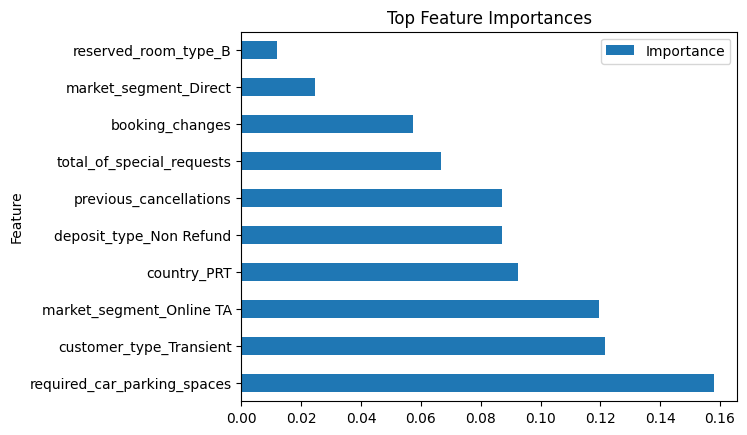

In [ ]:
best_model.fit(X_train_preprocessed, y_train)
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_preprocessed.columns, 'Importance': importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

top_features.plot(x='Feature', y='Importance', kind='barh', title='Top Feature Importances')
plt.show()



Dapat dilihat dari feature importances hasil model Gradient Booster Classifier yang telah dilakukan diatas bahwa fitur required car parking spaces adalah yang paling tinggi, diikuti oleh customer type transient, market segment online TA, country PRT (portugal), previous cancellations, deposit type Non Refund, dan seterusnya. Sehingga, parking space merupakan fitur utama yang berpengaruh terhadap cancellations booking.

# Conclusion & Recommendation

Model yang telah dibuat telah di tunning sehingga maksimal metricsnya. Namun, pada model Gradient Boosting Classifier tersebut masih terdapat limitasi:
- Secara umum, Gradient Boosting memiliki sensitif yang tinggi terhadap outliers. Sehingga handling terhadap outliers menjadi krusial.
- Gradient Boosting rawan terjadi overfitting. Apalagi jika model yang terlalu kompleks atau jumlah trees yang terlalu tinggi.
- Banyak yang consider bahwa gradient boosting merupakan model 'black-box' yang artinya susah untuk diintepretasikan.
- Jika datanya imbalanced, maka 1 class akan secara signifikan outweighs yang lainnya.
- Gradient boosting bisa jadi mahal karena membutuhkan komputer super. Apalagi saat melakukan pada dataset yang banyak.
- Hyperparameter tunning yang tidak mudah. Akan memakan waktu sehingga tidak efektif pengerjaannya.

Sehingga rekomendasi untuk modelling dari yang telah dilakukan adalah:
- Handling outliers penting dalam modelling menggunakan Gradient Boosting
- Meningkatkan jumlah data, menggunakan model architecture dengan parameter yang lebih sedikit.
- Teknik seperti bagging (bootstrap aggregating) dan random forests menggabungkan prediksi dari beberapa base models sehingga dapat mengurangi overfitting.
- Consult dengan domain expert terkait hyperparameter tunning agar tunning lebih akurat.

In [43]:
y_pred = best_model.predict(X_test_preprocessed)
y_pred_default = estimator.predict(X_test)
report_default = classification_report(y_test, y_pred_default)
print('Classification Report Default Gradient Booster : \n', report_default)
print('Classification Report Tuned Gradient Booster : \n', classification_report(y_test, y_pred))

Classification Report Default Gradient Booster : 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1533
           1       0.42      0.29      0.34       484

    accuracy                           0.73      2017
   macro avg       0.61      0.58      0.59      2017
weighted avg       0.71      0.73      0.72      2017

Classification Report Tuned Gradient Booster : 
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1533
           1       0.46      0.79      0.58       484

    accuracy                           0.73      2017
   macro avg       0.69      0.75      0.69      2017
weighted avg       0.81      0.73      0.75      2017



Dapat dilihat dari classification report diatas bahwa model mengalami kenaikkan yang signifikan setelah dilakukan tunning. 

Dari model yang telah di tunning, dapat dilihat bahwa apabila model digunakan untuk memprediksi booking cancellations pada hotel x, maka 79% dari orang yang akan cancel dapat diantisipasi oleh manajemen. Sedangkan 71% dari keseluruhan bookingan akan tidak cancel (hal ini didasari dari recall)

Model yang telah dibuat memiliki ketepatan prediksi sebesar 46% terhadap orang yang akan cancel, dan untuk customer yang tidak cancel ketepatan prediksinya sebesar 91% (dari precision). Sehingga, masih ada sebesar 29% customer yang sebenarnya tidak cancel namun diprediksi sebagai cancel (dari recall).

Dari data analisis diketahui bahwa kerugian yang telah dialami oleh hotel x akibat cancellation adalah sebesar (158 x 23.8%) x €137 = €5,151,000
Dengan jumlah kamar sebanyak 158,000 x 23.8% = 37.6 ribu atau kurang lebih 38 ribu kamar yang kosong akibat cancellation

Dengan modelling ini, maka kerugian tersebut dapat ditekan dan dimitigasi. Dari asumsi total kamar sebesar 158 dan cancellation rate 23.8% dari dataset, melalui modelling diketahui bahwa 79% akan cancel. Maka setelah modelling dapat diprediksi:
- 79% x (158,000 x 23.8%) = 29.7 ribu == kurang lebih 30 ribu kamar akan dapat diprediksi akan cancel pertahunnya.
- 30 x €137 = €4,110,000 adalah jumlah uang yang dapat disave dari kerugian yang telah dialami hotel.

Sehingga, dengan adanya modelling ini, hotel x dapat save uang sebesar €4,110,000 dari total kerugian yang telah dialami sebesar €5,151,000 atau dapat menekan angka kerugian sebesar 79.7% akibat cancel.



Manajemen dapat melakukan beberapa hal untuk booking yang kemungkinan besar akan dicancel dan memitigasi hal tersebut agar kerugian akibat cancellation dapat ditekan lebih jauh:
- Memberikan peringatan kepada seluruh customer agar akan mengkonfirmasi ulang setelah booking dilakukan.
- Menghubungi customer yang kemungkinan cancel untuk mengkonfirmasi ulang bookingan.
- Block customer yang berulang kali melakukan cancel
- Memfokuskan kepada customer type Transient dan market segment Online TA untuk booking cancellations handling.
- Sesuaikan kebutuhan parkir dengan customer yang datang.
- Fokus service kepada seluruh customer terutama direct customer agar dapat maintain reputasi hotel selalu sedia kamar dan tidak 'penuh' yang kenyataannya masih ada kamar kosong.
- Menangkan persaingan dengan airbnb dan kompetitor lainnya melalui sistem cancellation yang tidak merugikan hotel.

## Save Model

In [45]:
import pickle

with open('model_capstone_3_Athian.pkl', 'wb') as file_model:
    pickle.dump(model, file_model)